<a href="https://colab.research.google.com/github/CodeHunterOfficial/PointsApplication/blob/master/Mikhailova_forecast_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача

Построить прогноз количества перерабатываемых контейнеров на год вперед.

Загружаем библиотеки.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
%run f2forecast.py

Читаем файл с данными (лист 'Data').

In [ ]:
df=pd.read_excel("forecast_dataset.xlsx", index_col='Xm', sheet_name='Data')
df.head()

,Y
Xm,
2010-01-01,1219.0
2010-02-01,1477.0
2010-03-01,1863.0
2010-04-01,1554.0
2010-05-01,1443.0


In [ ]:
df.tail()

,Y
Xm,
2019-08-01,2192.3
2019-09-01,2333.4
2019-10-01,2606.7
2019-11-01,2527.5
2019-12-01,2491.0


In [ ]:
df['2019']

,Y
Xm,
2019-01-01,2208.5
2019-02-01,2337.1
2019-03-01,2145.0
2019-04-01,1561.6
2019-05-01,1147.7
2019-06-01,940.6
2019-07-01,1632.5
2019-08-01,2192.3
2019-09-01,2333.4


# Кварталы


In [ ]:
#группировка данных по кварталам
df2=df[:"2019-12-01"].resample('Q').sum()

In [ ]:
df2.head()

,Y
Xm,
2010-03-31,4559.0
2010-06-30,4421.0
2010-09-30,4035.0
2010-12-31,5100.0
2011-03-31,4024.0


In [ ]:
df2.tail()

,Y
Xm,
2018-12-31,7884.8
2019-03-31,6690.6
2019-06-30,3649.9
2019-09-30,6158.2
2019-12-31,7625.2


Проведем валидацию данных на отсутствие пропусков.

In [ ]:
df2 = validate_series(df2)
print(df2)

                 Y
Xm                
2010-03-31  4559.0
2010-06-30  4421.0
2010-09-30  4035.0
2010-12-31  5100.0
2011-03-31  4024.0
2011-06-30  3633.0
2011-09-30  5333.0
2011-12-31  7021.0
2012-03-31  5766.0
2012-06-30  4660.0
2012-09-30  4685.2
2012-12-31  5249.0
2013-03-31  2866.0
2013-06-30  2540.0
2013-09-30  4633.0
2013-12-31  6036.0
2014-03-31  4125.0
2014-06-30  3756.0
2014-09-30  5496.0
2014-12-31  7224.0
2015-03-31  5213.5
2015-06-30  3763.0
2015-09-30  5218.7
2015-12-31  6983.0
2016-03-31  5632.5
2016-06-30  4038.0
2016-09-30  5150.7
2016-12-31  6790.5
2017-03-31  5636.4
2017-06-30  4845.5
2017-09-30  5980.8
2017-12-31  8283.3
2018-03-31  7761.7
2018-06-30  7849.8
2018-09-30  6222.9
2018-12-31  7884.8
2019-03-31  6690.6
2019-06-30  3649.9
2019-09-30  6158.2
2019-12-31  7625.2


In [ ]:
del df

Построим график и посмотрим основные параметры нашего ряда. 

[<AxesSubplot:>]

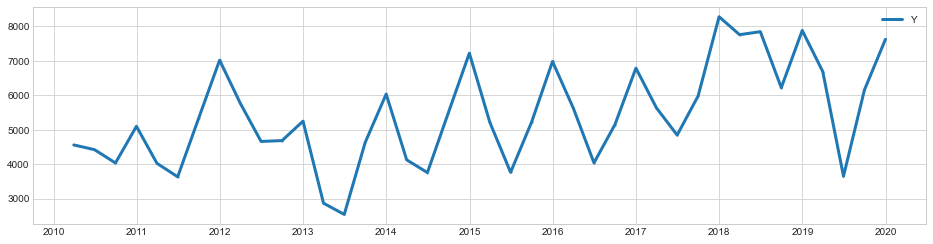

In [ ]:
plot(df2,ts_linewidth=3)

# Выявление и корректировка анномалий

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

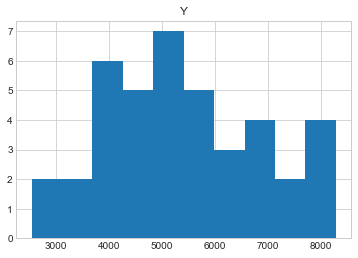

In [ ]:
df2.hist()

In [ ]:
df2.describe()

,Y
count,40.000000
mean,5413.530000
std,1455.232701
min,2540.000000
25%,4347.000000
50%,5233.850000
75%,6339.825000
max,8283.300000


Отобразим точки на графике, которые больше 8000 контейнеров в квартал и меньше 3000.

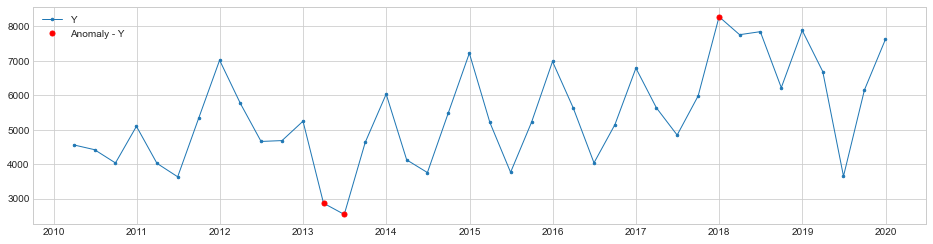

In [ ]:
threshold_ad = ThresholdAD(high=8000, low=3000)
anomalies = threshold_ad.detect(df2)
plot(df2, anomaly=anomalies, ts_linewidth=1, ts_markersize=5, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [ ]:
anomalies[anomalies.Y]

,Y
Xm,
2013-03-31,True
2013-06-30,True
2017-12-31,True


Аномалии пришлись на три точки. 

Взглянем на сезонную компоненту. 

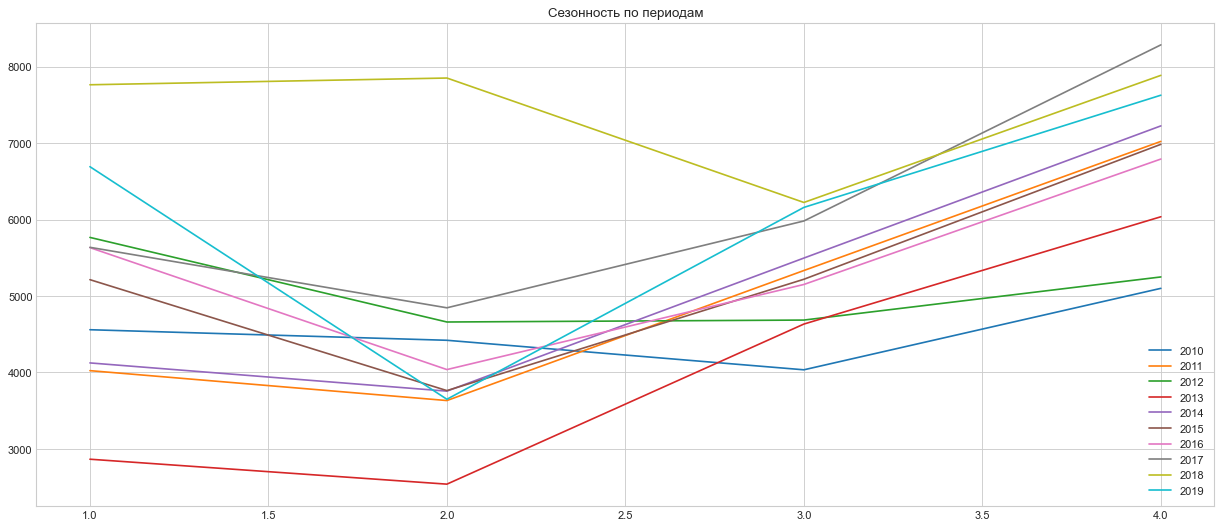

In [ ]:
sesonal(df2,4)

странно выглядит 2013 год(как он низко пошел как год аномалий).
2019 год высоко стартует,но падает достаточно низким уровнем. Это скорее всего будет нашей проблемой с точки зрения прогнозирования, то есть он аномальный.
2010, 2012 гг  также выбиваются из общего тренда сезонности. 
Будем использовать данные только с 2014 года, тк 2010, 2011 либо много корректированть, либо эти данные не совсем сопоставимы с тем, что у нас с вами есть дальше. 

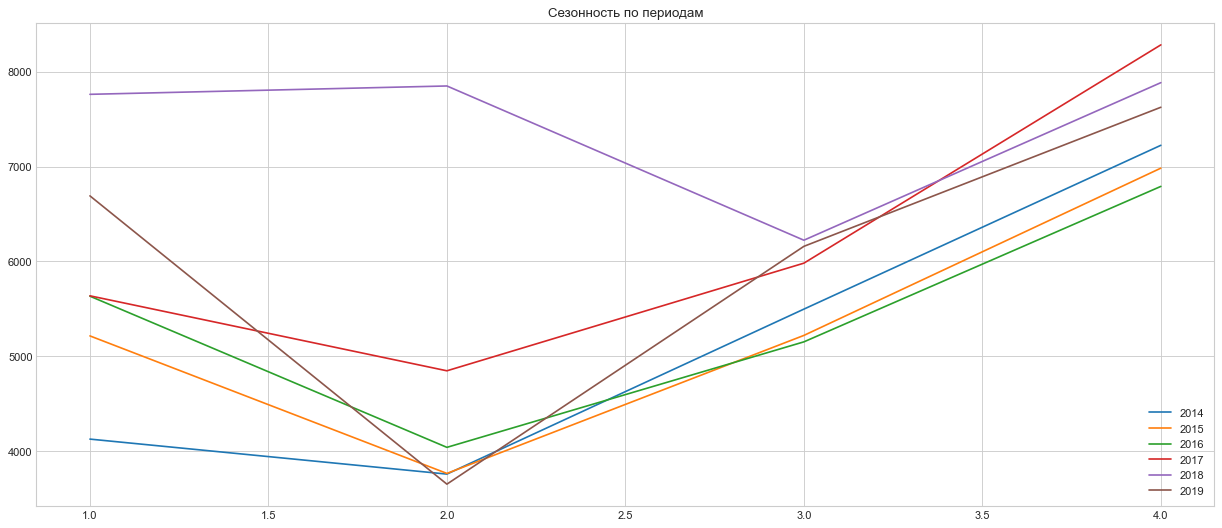

In [ ]:
sesonal(df2['2014':],4)

# Декомпозиция: тест и сезонность

Выполним декомпозицию по мультипликативной и аддитивной моделям.

Text(0.5, 0.98, 'Мультипликативная модель')

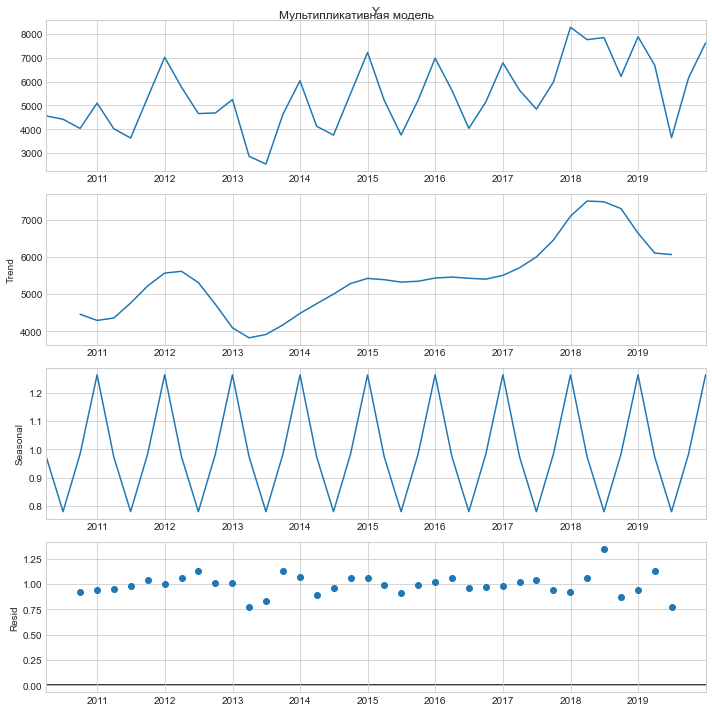

In [ ]:
# декомпозиция 
result_M = seasonal_decompose(df2.Y, model='multiplicative')

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультипликативная модель')

Text(0.5, 0.98, 'Аддитивная модель')

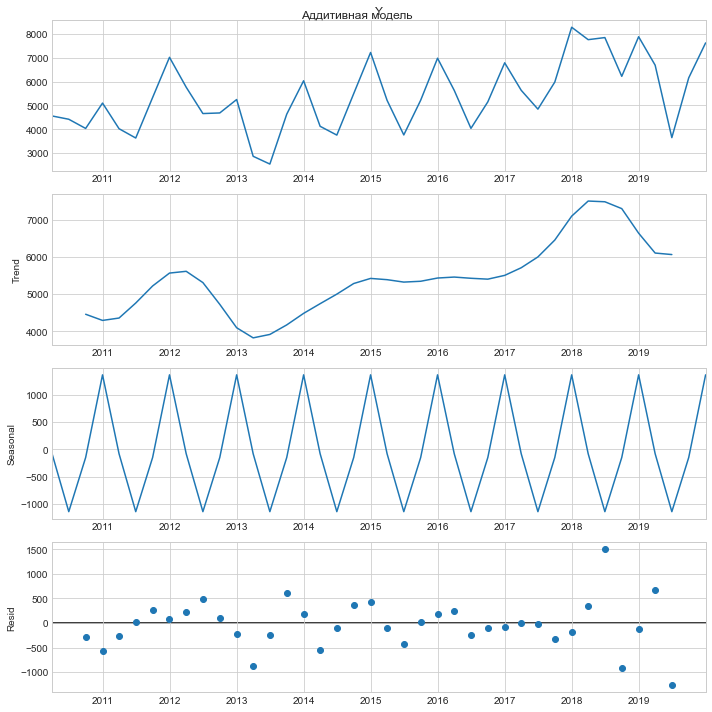

In [ ]:
# Decompose 
result_A = seasonal_decompose(df2.Y, model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Аддитивная модель')

В ряду мы наблюдаем явный как тренд, так и сезонную компоненту. Визуально и аддитивная, и мультипликативная модели выглядят одинаково предпочтительно.

# Корректировка ряда

Корректируем первый и второй кварталы 2018 года

In [ ]:
df2.loc['2018-03-31']=df2.loc['2017-03-31']
df2.loc['2018-06-30']=df2.loc['2017-06-30']                

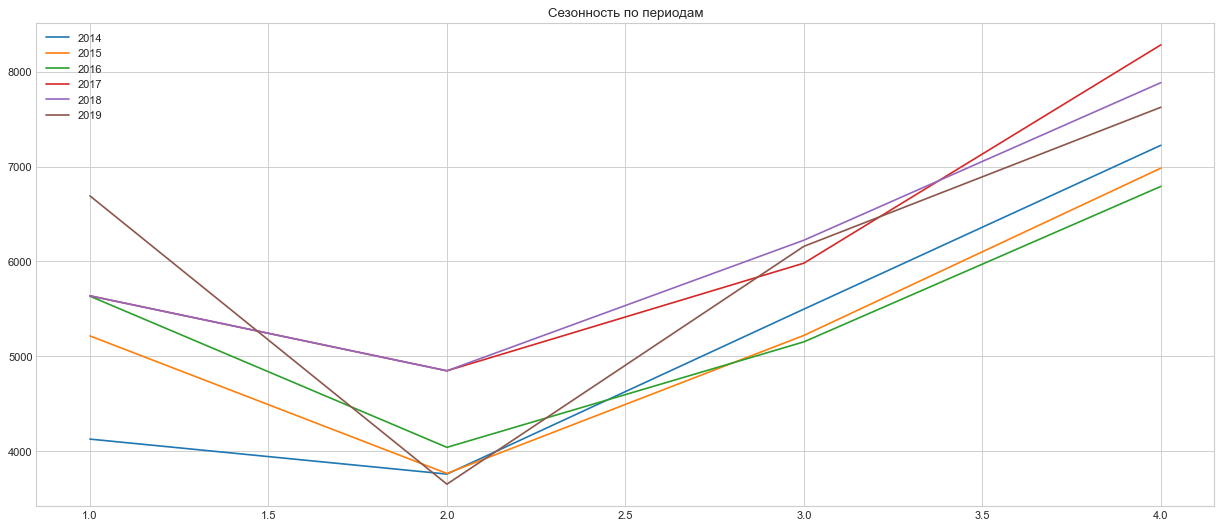

In [ ]:
sesonal(df2['2014':],4)

Достаточно ровная картинка,ко крайней мере кроме 2019 года. Данные чисты и сопоставимы, пригодны для прогнозирования

# Тренировочные и тестовые данные

Разделим данные на тренировочные и тестовые. В качестве тестовых возьмем 4 квартала.

In [ ]:
train=df2['2014':'2018-06-30']
train.tail()

,Y
Xm,
2017-06-30,4845.5
2017-09-30,5980.8
2017-12-31,8283.3
2018-03-31,5636.4
2018-06-30,4845.5


In [ ]:
test=df2['2018-09-30':'2019-06-30']
test.head()

,Y
Xm,
2018-09-30,6222.9
2018-12-31,7884.8
2019-03-31,6690.6
2019-06-30,3649.9


In [ ]:
test

,Y
Xm,
2018-09-30,6222.9
2018-12-31,7884.8
2019-03-31,6690.6
2019-06-30,3649.9


In [ ]:
train

,Y
Xm,
2014-03-31,4125.0
2014-06-30,3756.0
2014-09-30,5496.0
2014-12-31,7224.0
2015-03-31,5213.5
2015-06-30,3763.0
2015-09-30,5218.7
2015-12-31,6983.0
2016-03-31,5632.5


# Модель Хольта-Винтерса

Построим четыре варианта модели Хольта-Винтерса.

In [ ]:
#обучение модели и оценка точности
fit1 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='mul').fit()
metrics(train, fit1.fittedvalues)

Тест на стационарность:
	T-статистика = -3.173
	P-значение = 0.022
Критические значения :
	1%: -4.331573 - Данные не стационарны с вероятностью 99% процентов
	5%: -3.23295 - Данные не стационарны с вероятностью 95% процентов
	10%: -2.7487 - Данные  стационарны с вероятностью 90% процентов
MAD: 335.5139
MSE: 179572.9985
MAPE: 0.066
MPE: -0.0019
Стандартная ошибка: 423.7605


In [ ]:
fit2 = ExponentialSmoothing(train, seasonal_periods=4, trend='mul', seasonal='mul').fit()
metrics(train, fit2.fittedvalues)

Тест на стационарность:
	T-статистика = -3.050
	P-значение = 0.030
Критические значения :
	1%: -4.331573 - Данные не стационарны с вероятностью 99% процентов
	5%: -3.23295 - Данные не стационарны с вероятностью 95% процентов
	10%: -2.7487 - Данные  стационарны с вероятностью 90% процентов
MAD: 329.5786
MSE: 179135.055
MAPE: 0.0655
MPE: -0.0125
Стандартная ошибка: 423.2435


In [ ]:
fit3 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='add').fit()
metrics(train, fit3.fittedvalues)

Тест на стационарность:
	T-статистика = -3.463
	P-значение = 0.009
Критические значения :
	1%: -4.331573 - Данные не стационарны с вероятностью 99% процентов
	5%: -3.23295 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.7487 - Данные  стационарны с вероятностью 90% процентов
MAD: 347.8357
MSE: 169975.4113
MAPE: 0.0665
MPE: -0.005
Стандартная ошибка: 412.2807


In [ ]:
fit4 = ExponentialSmoothing(train, seasonal_periods=4, trend='mul', seasonal='add').fit()
metrics(train, fit4.fittedvalues)

Тест на стационарность:
	T-статистика = -5.429
	P-значение = 0.000
Критические значения :
	1%: -4.331573 - Данные  стационарны с вероятностью 99% процентов
	5%: -3.23295 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.7487 - Данные  стационарны с вероятностью 90% процентов
MAD: 336.5731
MSE: 153414.1375
MAPE: 0.064
MPE: -0.0097
Стандартная ошибка: 391.6812


По оценке на тренировочных данных у модели (4) с мультипликативным трендом и аддитивной сезонностью выше точность. Проверим модели на тестовых данных.

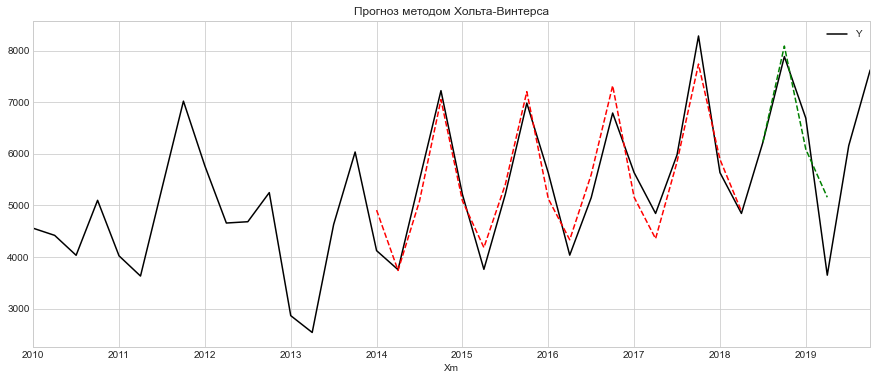

In [ ]:
ax = df2.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта-Винтерса")
#test.plot(ax=ax, style='--', color='black')
fit4.fittedvalues.plot(ax=ax, style='--', color='red')
fit4.forecast(4).plot(ax=ax, style='--', color='green')
plt.show()

In [ ]:
metrics(test, fit1.forecast(len(test)))

Тест на стационарность:
	T-статистика = -10.360
	P-значение = 0.000
Критические значения :
	1%: -10.41719074074074 - Данные не стационарны с вероятностью 99% процентов
	5%: -5.77838074074074 - Данные  стационарны с вероятностью 95% процентов
	10%: -3.391681111111111 - Данные  стационарны с вероятностью 90% процентов
MAD: 572.0097
MSE: 487636.6666
MAPE: 0.12
MPE: -0.0626
Стандартная ошибка: 698.3099


In [ ]:
metrics(test, fit2.forecast(len(test)))

Тест на стационарность:
	T-статистика = -21.041
	P-значение = 0.000
Критические значения :
	1%: -10.41719074074074 - Данные  стационарны с вероятностью 99% процентов
	5%: -5.77838074074074 - Данные  стационарны с вероятностью 95% процентов
	10%: -3.391681111111111 - Данные  стационарны с вероятностью 90% процентов
MAD: 571.4953
MSE: 536235.2761
MAPE: 0.1225
MPE: -0.0851
Стандартная ошибка: 732.2809


In [ ]:
metrics(test, fit3.forecast(len(test)))

Тест на стационарность:
	T-статистика = -9.848
	P-значение = 0.000
Критические значения :
	1%: -10.41719074074074 - Данные не стационарны с вероятностью 99% процентов
	5%: -5.77838074074074 - Данные  стационарны с вероятностью 95% процентов
	10%: -3.391681111111111 - Данные  стационарны с вероятностью 90% процентов
MAD: 526.3847
MSE: 587848.0876
MAPE: 0.1227
MPE: -0.0796
Стандартная ошибка: 766.7125


In [ ]:
metrics(test, fit4.forecast(len(test)))

Тест на стационарность:
	T-статистика = -9.219
	P-значение = 0.000
Критические значения :
	1%: -10.41719074074074 - Данные не стационарны с вероятностью 99% процентов
	5%: -5.77838074074074 - Данные  стационарны с вероятностью 95% процентов
	10%: -3.391681111111111 - Данные  стационарны с вероятностью 90% процентов
MAD: 580.1356
MSE: 670356.3228
MAPE: 0.1326
MPE: -0.0875
Стандартная ошибка: 818.7529


Мы видим, что модель (2) показала неплохой результат в части сопоставления с тестовыми данными. 

Давайте эту модель с trend='add', seasonal='mul' обучим на полном ряду данных начиная с 2014 года.

In [ ]:
fit = ExponentialSmoothing(df2['2014':], seasonal_periods=4, trend='add', seasonal='mul').fit()

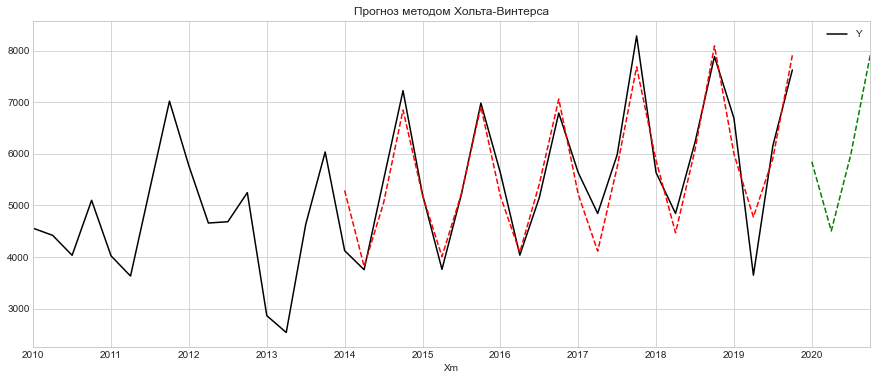

In [ ]:
ax = df2.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта-Винтерса")
#test.plot(ax=ax, style='--', color='black')
fit.fittedvalues.plot(ax=ax, style='--', color='red')
fit.forecast(4).plot(ax=ax, style='--', color='green')
plt.show()

# SARIMA

Построим поквартальную модель методом SARIMA.

Изучим результаты автокорреляции. 

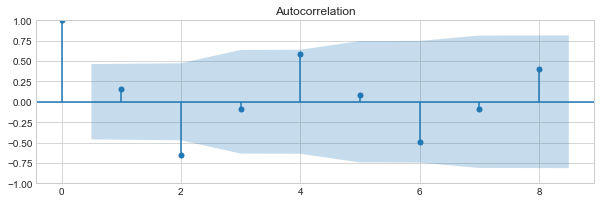

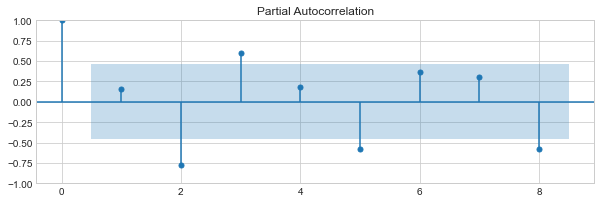

In [ ]:
plt.rcParams.update({'figure.figsize': (10,3)})
plot_acf(train.Y, lags=8)
plot_pacf(train.Y, lags=8)
plt.show()

Четкого тренда и квартальной сезонности статистически не видно, но попробуем использовать сезонную модель. 

In [ ]:
model = auto_arima(train, seasonal=True, m=4, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=218.063, Time=2.04 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=219.451, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=218.389, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=221.234, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[4] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,2)(1,1,0)[4] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,2)(2,1,1)[4] intercept   : AIC=217.771, Time=0.56 sec
 ARIMA(2,0,2)(2,1,0)[4] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,2)(2,1,2)[4] intercept   : AIC=220.850, Time=0.61 sec
 ARIMA(2,0,2)(1,1,2)[4] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,0,2)(2,1,1)[4] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,0,1)(2,1,1)[4] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,0,2)(2,1,1)[4] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,0,3)(2,1,1)[4] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,0,1)(2,1,

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(2, 1, 1, 4),
      suppress_warnings=True)

Посмотрим на нашу модель

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(2, 0, 2),
                                seasonal_order=(2, 1, 1, 4))
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9549      0.401      2.379      0.017       0.168       1.742
ar.L2         -0.7376      0.218     -3.388      0.001      -1.164      -0.311
ma.L1         -0.2661      0.469     -0.568      0.570      -1.185       0.653
ma.L2          0.9432      3.692      0.255      0.798      -6.293       8.180
ar.S.L4       -0.4803      0.826     -0.582      0.561      -2.098       1.138
ar.S.L8       -0.1021      0.466     -0.219      0.827      -1.016       0.812
ma.S.L4        0.8771      2.052      0.427      0.669      -3.145       4.899
sigma2      9.377e+04   3.09e+05      0.304      0.761   -5.12e+05    6.99e+05


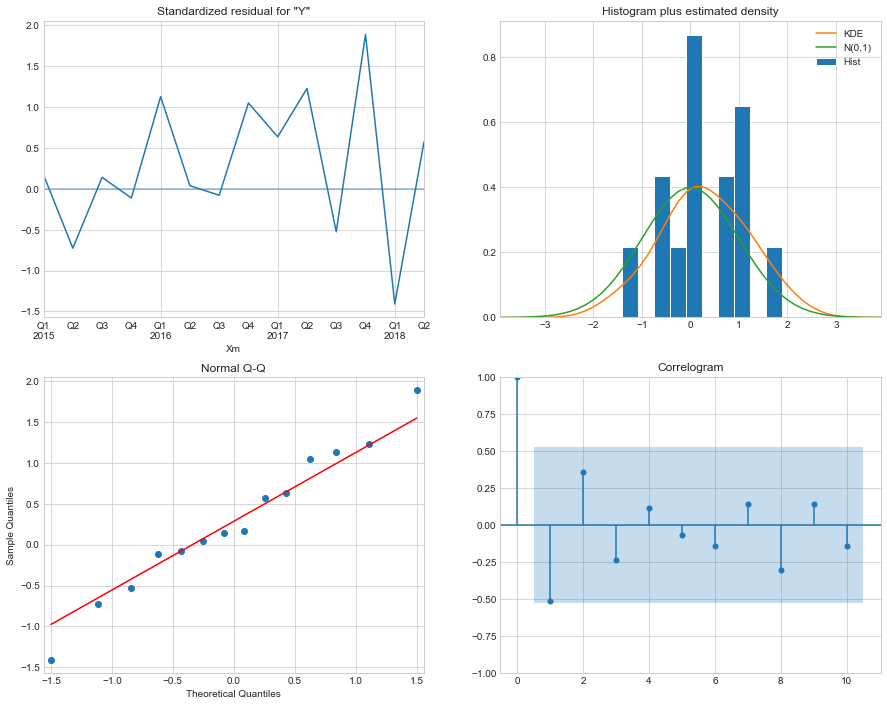

In [ ]:
#визуализация графиков остатков диагностических
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Остатки стационарные, если судить по диагностической модели. Есть незначительные выбросы в распределении остатков.

Взглянем на предсказанные значения.

In [ ]:
predict=results.get_prediction()
predict.predicted_mean[:10]

Xm
2014-03-31       0.000000
2014-06-30     569.696388
2014-09-30     672.125025
2014-12-31     756.501345
2015-03-31    5127.079924
2015-06-30    4062.896632
2015-09-30    5161.084555
2015-12-31    7026.127009
2016-03-31    5210.558096
2016-06-30    4023.625413
Freq: Q-DEC, Name: predicted_mean, dtype: float64

Попробуем оценить точность нашей модели, начнем с 2014 года

In [ ]:
predict=results.get_prediction(start=pd.to_datetime('2014-06-30'))
metrics(train['2014-06-30':], predict.predicted_mean)

Тест на стационарность:
	T-статистика = -2.113
	P-значение = 0.239
Критические значения :
	1%: -3.9240193847656246 - Данные не стационарны с вероятностью 99% процентов
	5%: -3.0684982031250003 - Данные не стационарны с вероятностью 95% процентов
	10%: -2.67389265625 - Данные не стационарны с вероятностью 90% процентов
MAD: 1053.2994
MSE: 4504512.1147
MAPE: 0.1898
MPE: 0.1659
Стандартная ошибка: 2122.3836


Таким образом, модель мы использовать не можем, данные не стационарны, поэтому все остальные показатели для нас не интересны.
То есть модель SARIMA показала не лучший результат

Попробуем натренировать нашу модель с сезонностью = 2, а не 4

In [ ]:
model = auto_arima(train, seasonal=True, m=2, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
model

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[2] intercept   : AIC=285.510, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[2] intercept   : AIC=296.296, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[2] intercept   : AIC=282.911, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[2] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[2]             : AIC=294.381, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[2] intercept   : AIC=298.117, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[2] intercept   : AIC=284.861, Time=0.32 sec
 ARIMA(1,0,0)(1,1,1)[2] intercept   : AIC=284.325, Time=0.32 sec
 ARIMA(1,0,0)(0,1,1)[2] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(2,1,1)[2] intercept   : AIC=287.116, Time=0.44 sec
 ARIMA(0,0,0)(1,1,0)[2] intercept   : AIC=288.323, Time=0.10 sec
 ARIMA(1,0,1)(1,1,0)[2] intercept   : AIC=284.039, Time=0.34 sec
 ARIMA(0,0,1)(1,1,0)[2] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(1,1,0)[2]             : AIC=281.084, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[2]             : AIC=296.137, Time=0.0

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 2),
      suppress_warnings=True, with_intercept=False)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 0, 2))
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7989      0.055     14.505      0.000       0.691       0.907
ar.S.L2       -0.8724      0.101     -8.663      0.000      -1.070      -0.675
sigma2      1.143e+06   3.85e+05      2.967      0.003    3.88e+05     1.9e+06


Выведим диагностические графики

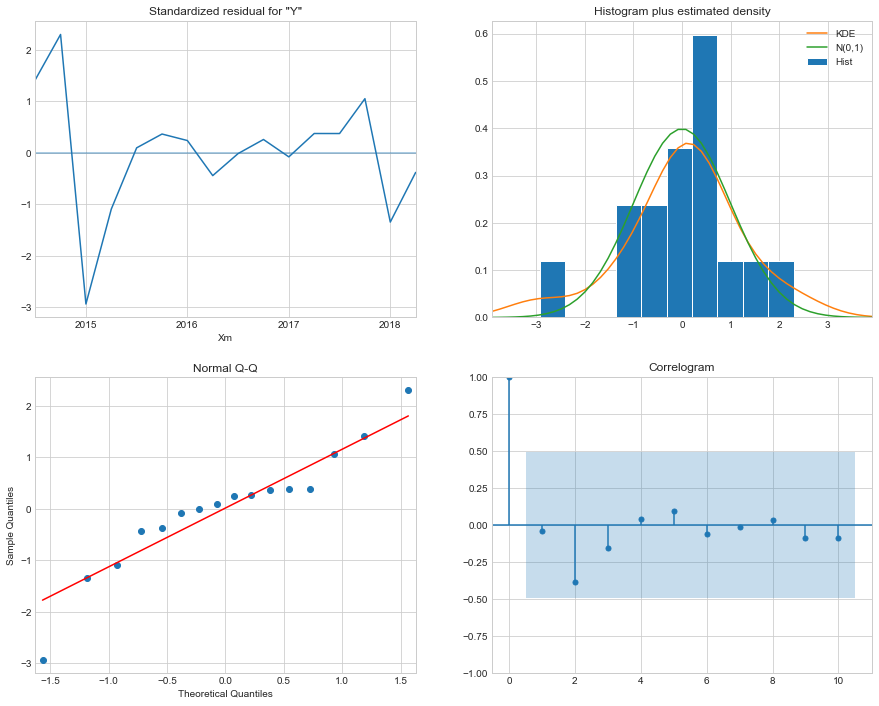

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Распределение в целом нормальное. Есть один большой выброс с точки зрения нормальности распределения. 

Взглянем на предсказанные значения.

In [ ]:
predict=results.get_prediction()
predict.predicted_mean[:10]

Xm
2014-03-31       0.000000
2014-06-30     749.668770
2014-09-30    3203.644191
2014-12-31    4008.407098
2015-03-31    8709.838899
2015-06-30    4928.313946
2015-09-30    5112.093960
2015-12-31    6589.723908
2016-03-31    5374.369207
2016-06-30    4508.000806
Freq: Q-DEC, Name: predicted_mean, dtype: float64

Попробуем оценить точность нашей модели

In [ ]:
predict=results.get_prediction(start=pd.to_datetime('2014-06-30'))
metrics(train['2014-06-30':], predict.predicted_mean)

Тест на стационарность:
	T-статистика = -3.194
	P-значение = 0.020
Критические значения :
	1%: -3.9644434814814815 - Данные не стационарны с вероятностью 99% процентов
	5%: -3.0849081481481484 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.6818144444444445 - Данные  стационарны с вероятностью 90% процентов
MAD: 1091.1853
MSE: 2504241.5971
MAPE: 0.2097
MPE: 0.0389
Стандартная ошибка: 1582.4796


Модель в любом случае дает очень большое отклонение. Попробуем посмотреть как это будет выглядить на графике

In [ ]:
predict=results.get_prediction(start='2018',end='2021')

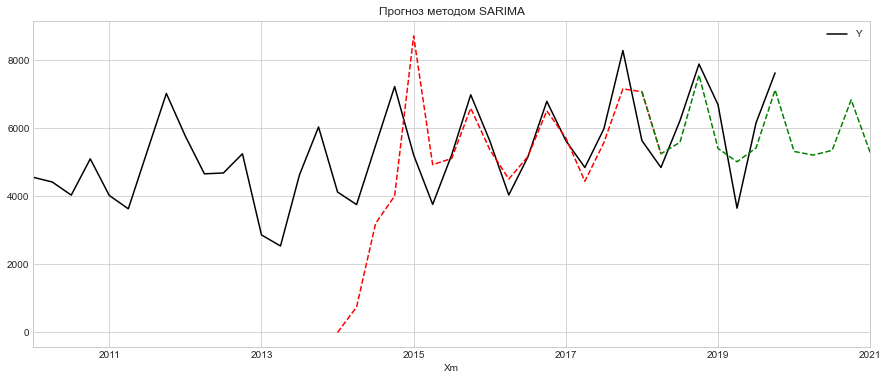

In [ ]:
ax = df2.plot(figsize=(15,6), color='black', title="Прогноз методом SARIMA")
#test.plot(ax=ax, style='--', color='black')
results.fittedvalues.plot(ax=ax, style='--', color='red')
predict.predicted_mean.plot(ax=ax, style='--', color='green')
plt.show()

Определила очень большую ошибку, нестандартное поведение в начале 2018 года. То есть это те данные, которые мы корректировали

Попробуем нашу модель использовать с точки зрения предсказания наших тестовых данных

In [ ]:
test

,Y
Xm,
2018-09-30,6222.9
2018-12-31,7884.8
2019-03-31,6690.6
2019-06-30,3649.9


In [ ]:
predict=results.get_prediction(start='2018-09-30',end='2019-06-30')
metrics(test, predict.predicted_mean)

Тест на стационарность:
	T-статистика = -33.951
	P-значение = 0.000
Критические значения :
	1%: -10.41719074074074 - Данные  стационарны с вероятностью 99% процентов
	5%: -5.77838074074074 - Данные  стационарны с вероятностью 95% процентов
	10%: -3.391681111111111 - Данные  стационарны с вероятностью 90% процентов
MAD: 901.1144
MSE: 1004166.4407
MAPE: 0.1771
MPE: -0.0097
Стандартная ошибка: 1002.0811


Получили все равно хуже погрешности, чем у модели Хольта-Винтерса

In [ ]:
#прогноз на следующий период
fit.forecast(4)

2020-03-31    5846.949118
2020-06-30    4505.752006
2020-09-30    5979.832333
2020-12-31    7908.458690
Freq: Q-DEC, dtype: float64

In [ ]:
result_forecas=fit.forecast(4)

In [ ]:
result_forecas

2020-03-31    5846.949118
2020-06-30    4505.752006
2020-09-30    5979.832333
2020-12-31    7908.458690
Freq: Q-DEC, dtype: float64

In [ ]:
result_forecas['2020-06-30']=5000

In [ ]:
result_forecas['2020-09-30']=result_forecas['2020-09-30']*0.8

In [ ]:
result_forecas

2020-03-31    5846.949118
2020-06-30    5000.000000
2020-09-30    4783.865867
2020-12-31    7908.458690
Freq: Q-DEC, dtype: float64

In [ ]:
result_forecas.to_excel('01Qresult.xlsx')


# Множественная линейная регрессия


Прочитаем данные для регрессии. 

In [ ]:
dfR=pd.read_excel("dataset_lr.xlsx")
dfR.head()

,месяц,год,Средний вес поезда,Ср сут пробег,Ср сут производ-сть,Участковая скорость,Техническая скорость,Следование резервом,Грузооборот,Общий пробег,Вспомогательный пробег,Рабочий парк
0,1,2014,4027.789098,641.960404,1856.454766,43.490513,48.650967,46.806034,1.752266e+07,6468934.502,1394763.702,304.476691
1,2,2014,3990.677837,626.769432,1851.758001,42.398022,48.033059,44.161943,1.705135e+07,6140064.462,1150773.482,328.864210
2,3,2014,3975.466383,612.606054,1803.552082,41.240079,47.262731,43.586246,1.892131e+07,6862058.505,1244170.025,338.423825
3,4,2014,3938.356174,599.205064,1780.019054,40.198248,46.623835,39.842432,1.845964e+07,6647757.413,1119267.113,345.682531
4,5,2014,3914.920860,592.566632,1754.171330,39.482134,45.995732,39.464017,1.832765e+07,6658906.510,1167675.180,337.033450


In [ ]:
dfR.fillna(0,inplace=True)

<AxesSubplot:>

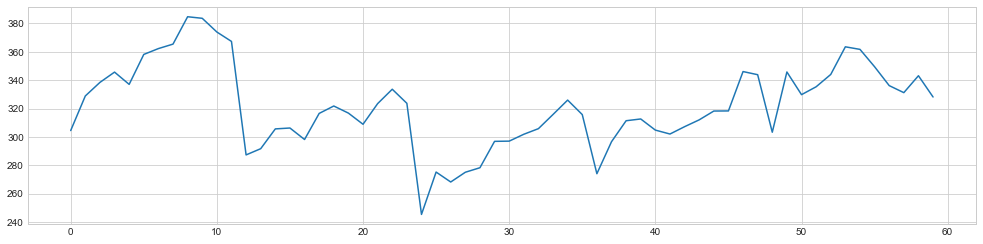

In [ ]:
dfR['Рабочий парк'].plot(figsize=(17,4))

In [ ]:
dfR.columns

Index(['месяц', 'год', 'Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк'],
      dtype='object')

In [ ]:
dfR.describe()

,месяц,год,Средний вес поезда,Ср сут пробег,Ср сут производ-сть,Участковая скорость,Техническая скорость,Следование резервом,Грузооборот,Общий пробег,Вспомогательный пробег,Рабочий парк
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000
mean,6.500000,2016.000000,3997.211421,611.878966,1844.309456,40.042498,45.220085,39.775652,1.799936e+07,6.440870e+06,1.173847e+06,321.730093
std,3.481184,1.426148,43.133927,30.713711,84.961605,2.761971,1.805134,3.372028,1.227346e+06,4.195539e+05,1.019157e+05,29.417297
min,1.000000,2014.000000,3907.499131,523.881062,1609.969608,32.790784,40.450633,34.220421,1.446510e+07,5.402079e+06,9.724066e+05,245.361109
25%,3.750000,2015.000000,3968.223697,598.803824,1798.377986,38.600381,44.201759,36.911014,1.728183e+07,6.146967e+06,1.101551e+06,304.183895
50%,6.500000,2016.000000,3998.246772,613.935739,1868.376552,40.164294,45.464114,39.841182,1.804833e+07,6.452955e+06,1.170902e+06,318.274013
75%,9.250000,2017.000000,4027.038922,627.928180,1900.589972,41.595073,46.196432,41.435805,1.886082e+07,6.732581e+06,1.232337e+06,343.304300
max,12.000000,2018.000000,4092.622170,666.313617,1978.610676,45.361862,48.650967,49.481372,2.009155e+07,7.183995e+06,1.433932e+06,384.711458


В данных нет пропусков.

Посмотрим на парные распределения и зависимости.

In [ ]:
dfR.columns

Index(['месяц', 'год', 'Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк'],
      dtype='object')

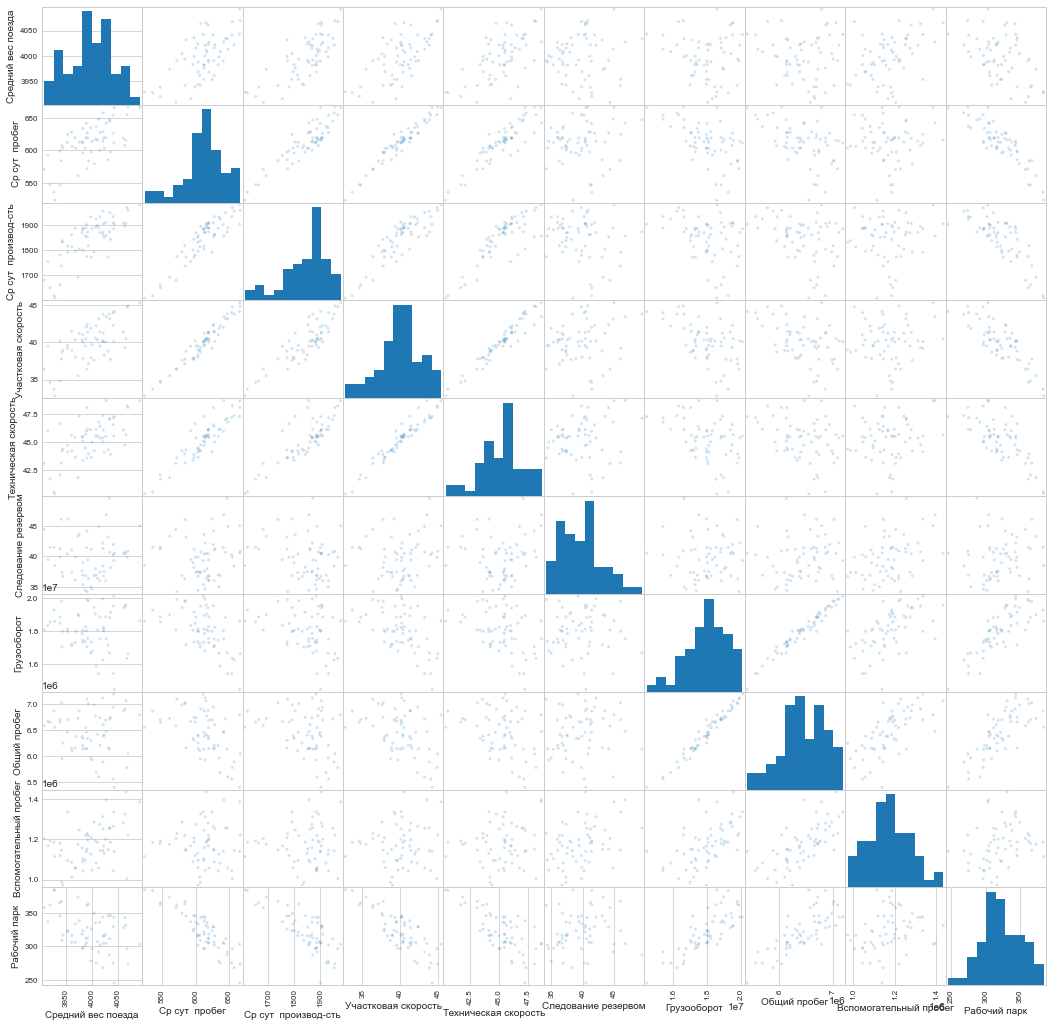

In [ ]:
scatter_matrix(dfR[['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк']], figsize=(18,18), alpha=0.2);

Посмотрим на парные корреляции. 

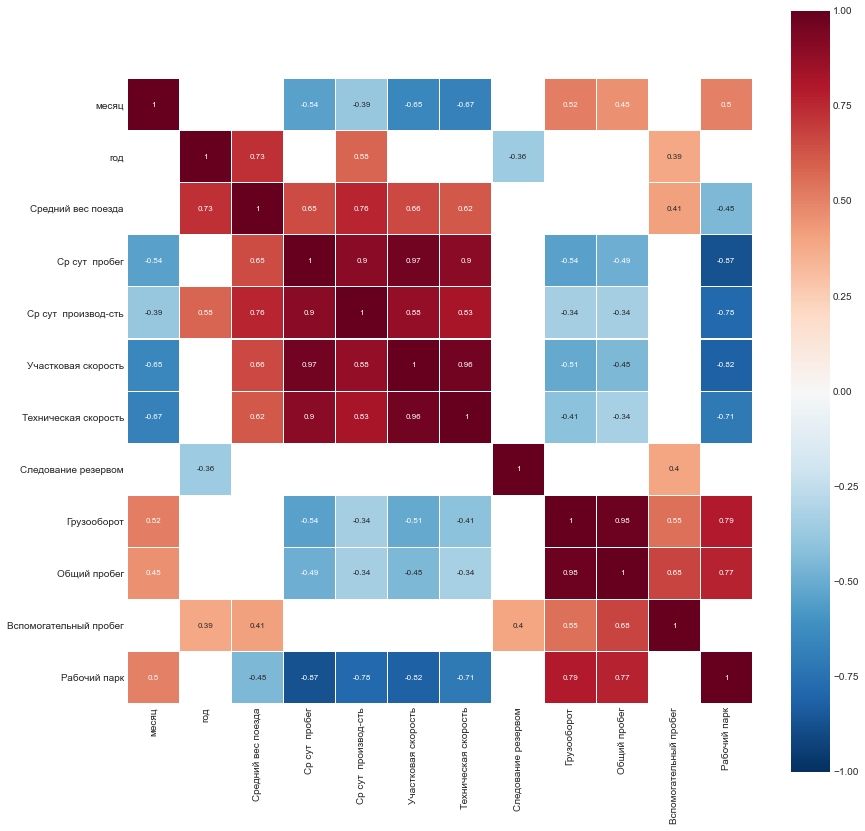

In [ ]:
h_map(dfR, 0.3)

<Figure size 1008x1008 with 0 Axes>

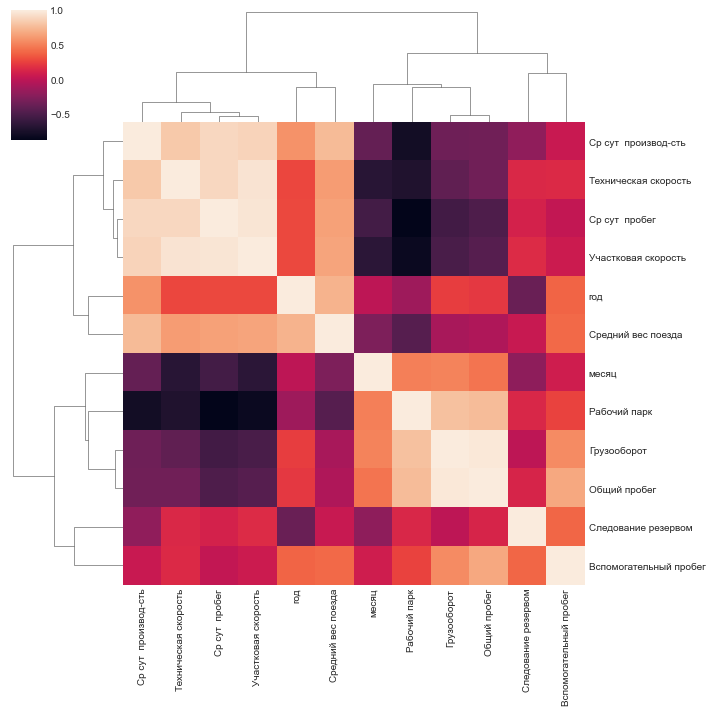

In [ ]:
plt.figure(figsize=(14,14))
sns.clustermap(dfR.corr())

Скорее всего, мы столкнемся с эффектом мультиколлинеарности. В частности, участковая и техническая скорость имеют высокую взаимозависимость.

In [ ]:
dfR.columns

Index(['месяц', 'год', 'Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк'],
      dtype='object')

In [ ]:
col=['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег']
#Разделим на влияющую и целевую переменные
X=dfR[col]
Y=dfR['Рабочий парк']

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     213.6
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.04e-36
Time:                        14:16:54   Log-Likelihood:                -177.27
No. Observations:                  60   AIC:                             374.5
Df Residuals:                      50   BIC:                             395.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -195

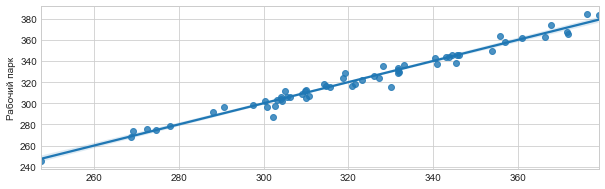

In [ ]:
X=sm.add_constant(X)

reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
r=res.predict(X)
r=np.array(res)
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

Как и ожидали, мы не можем использовать модель со всем набором данных. Выполним перебор параметров и найдем оптимальную модель.

In [ ]:
res=get_factors(dfR, Y, col)

Количество комбинаций  512
Результаты перебора в порядке возрастания MSE:
         MSE        r2                                         Переменные
0    71.1899  0.916341  [Участковая скорость, Грузооборот, Следование ...
1    81.3011  0.904459  [Участковая скорость, Общий пробег, Следование...
2   102.7088  0.879302  [Следование резервом, Ср сут  пробег, Ср сут  ...
3   108.9930  0.871917         [Участковая скорость, Общий пробег, const]
4   118.4978  0.860747          [Участковая скорость, Грузооборот, const]
5   119.4214  0.859662  [Следование резервом, Вспомогательный пробег, ...
6   135.1980  0.841122    [Вспомогательный пробег, Ср сут  пробег, const]
7   139.1183  0.836515  [Техническая скорость, Ср сут  пробег, Следова...
8   155.2335  0.817577       [Следование резервом, Ср сут  пробег, const]
9   169.9866  0.800240  [Участковая скорость, Вспомогательный пробег, ...
10  178.9255  0.789736  [Участковая скорость, Вспомогательный пробег, ...
11  180.1576  0.788288      [Техническ

Выведем наиболее значимые факторы

In [ ]:
res.loc[0][2]

['Участковая скорость', 'Грузооборот', 'Следование резервом', 'const']

Вверху параметры лучшей модели. Невысокий показатель R2. Попробуем построить модель.

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           3.92e-30
Time:                        14:17:01   Log-Likelihood:                -213.10
No. Observations:                  60   AIC:                             434.2
Df Residuals:                      56   BIC:                             442.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Следование резервом     2.0957    

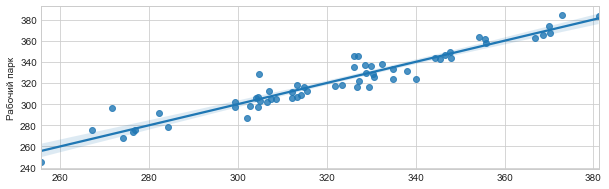

In [ ]:
Y=dfR['Рабочий парк']
dfR=sm.add_constant(dfR)
#укажем переменные, которые будем использовать в качестве регрессоров
X=dfR[['Следование резервом', 'Грузооборот', 'Участковая скорость', 'const']]
reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

**Рабочий парк=2.097 * Следование резервом + 1.151e-05 * Грузооборот -6.2  * Участковая скорость + 292**

In [ ]:
metrics(dfR['Рабочий парк'], res.fittedvalues)

Тест на стационарность:
	T-статистика = -1.344
	P-значение = 0.609
Критические значения :
	1%: -3.5745892596209488 - Данные не стационарны с вероятностью 99% процентов
	5%: -2.9239543084490744 - Данные не стационарны с вероятностью 95% процентов
	10%: -2.6000391840277777 - Данные не стационарны с вероятностью 90% процентов
MAD: 6.3904
MSE: 71.1899
MAPE: 0.0201
MPE: -0.0007
Стандартная ошибка: 8.4374


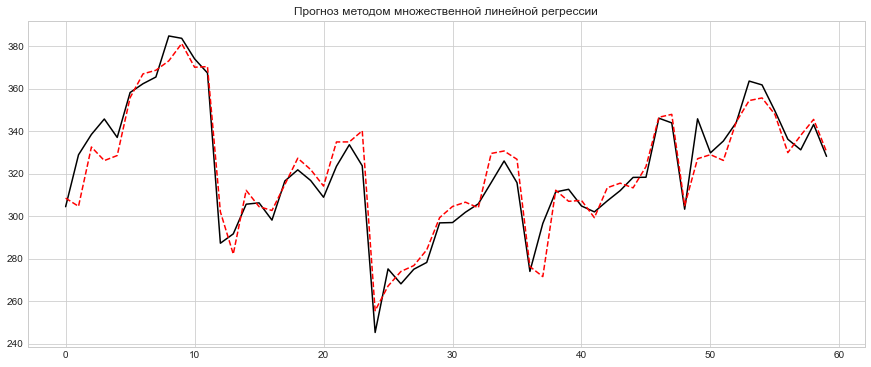

In [ ]:
ax = dfR['Рабочий парк'].plot(figsize=(15,6), color='black', title="Прогноз методом множественной линейной регрессии" )
res.fittedvalues.plot(ax=ax, style='--', color='red')
plt.show()

Модель множественной линейной регрессии – лучшая в настоящее время по точности прогноза. Есть потенциал для ее улучшения. Но использовать ее мы не можем, так как у нас отсутствует план инвестиций в рекламу. 